In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [ ]:
df = pd.read_csv("fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<Axes: title={'center': 'Corr. Pearson'}>

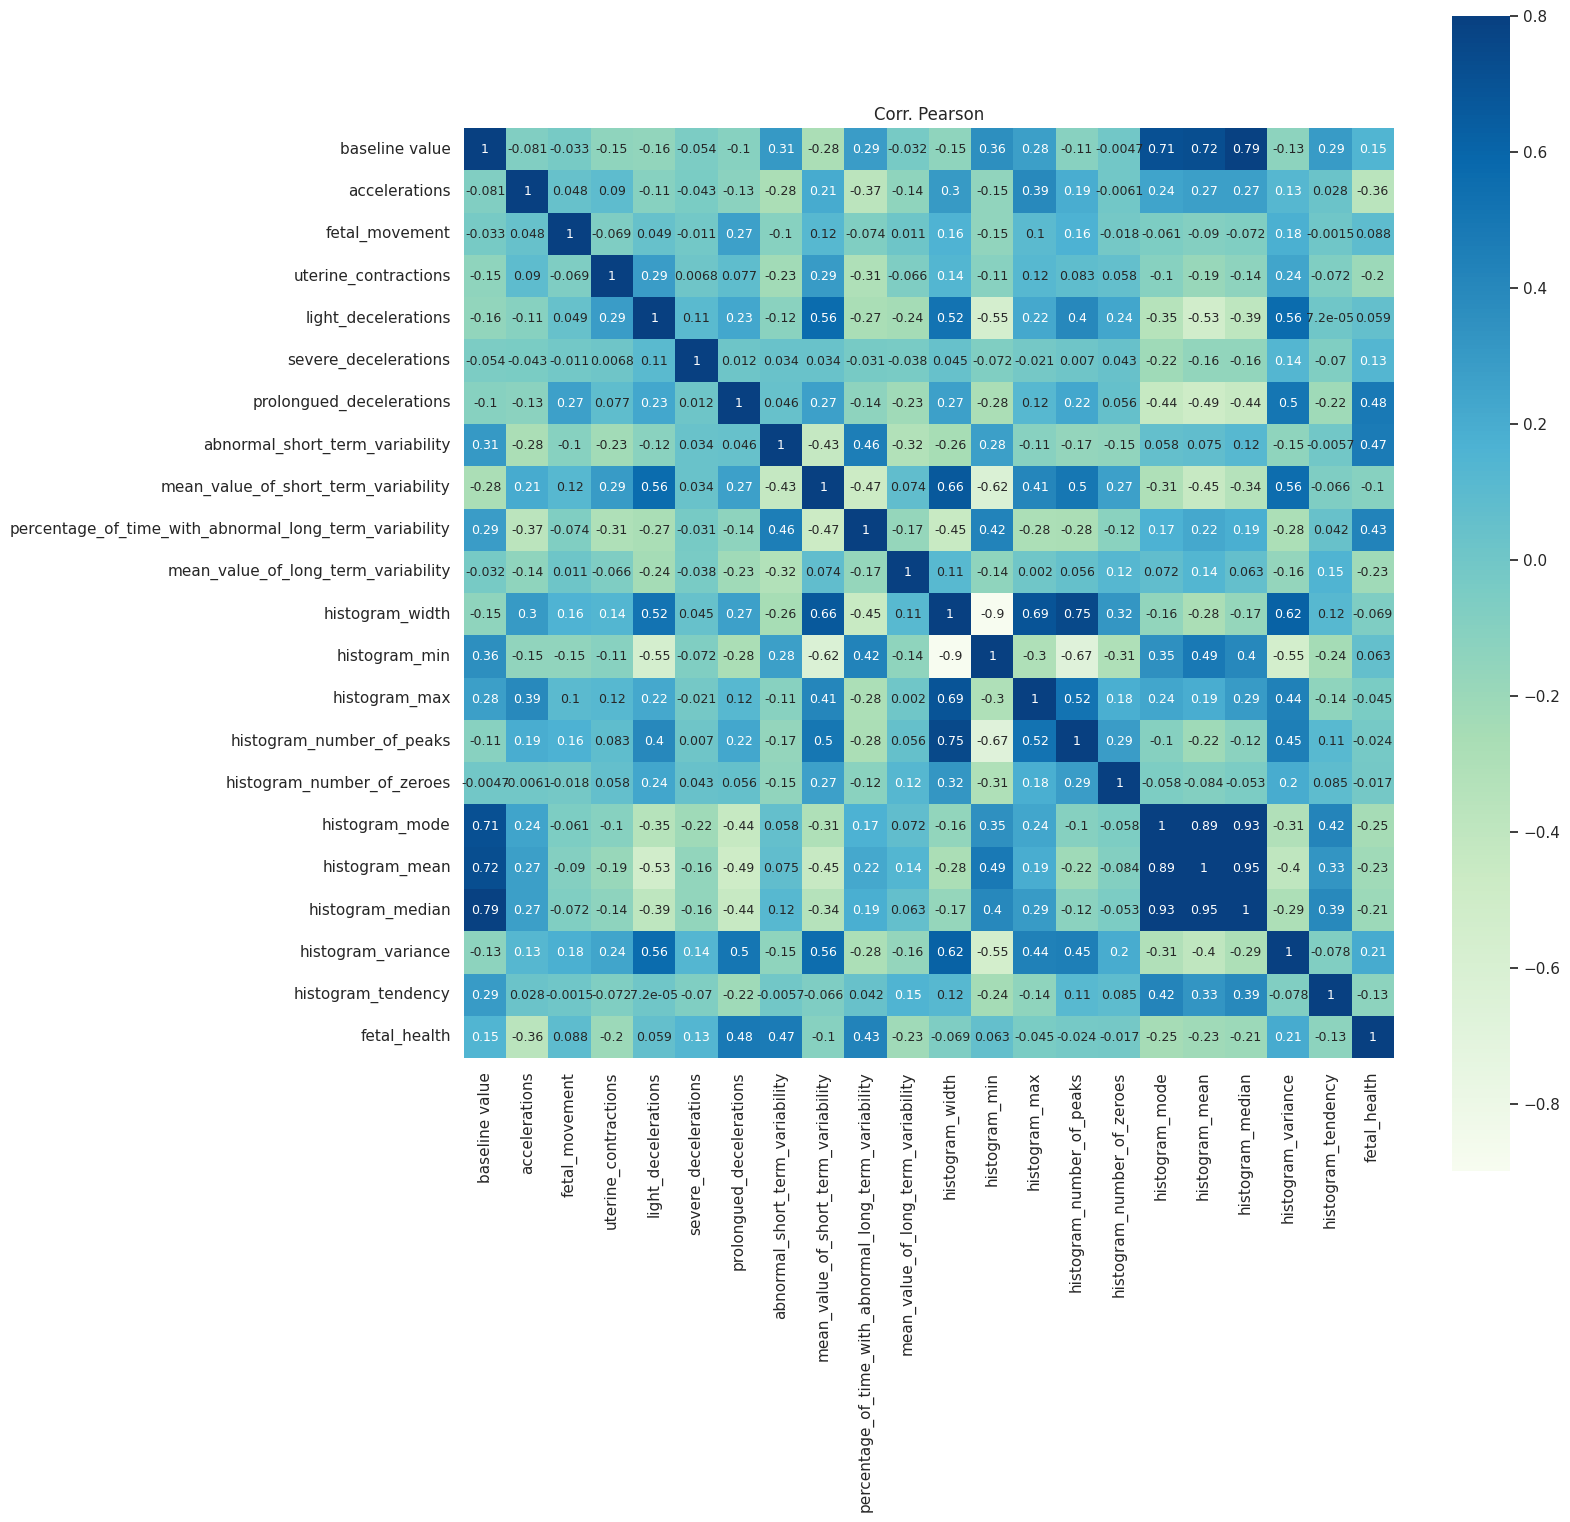

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,
            square=True,cmap="GnBu",
            linecolor='r', annot=True,
            annot_kws={'size':9})

##Eliminación de Columnas

In [ ]:
df = df.drop(['histogram_mode'],axis=1)
#df = df.drop(['histogram_median'],axis=1)
df = df.drop(['histogram_width'],axis=1)
df = df.drop(['histogram_mean'],axis=1)
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,62.0,126.0,2.0,0.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,68.0,198.0,6.0,1.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,68.0,198.0,5.0,1.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,53.0,170.0,11.0,0.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,53.0,170.0,9.0,0.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,137.0,177.0,4.0,0.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,103.0,169.0,6.0,0.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,103.0,170.0,5.0,0.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,103.0,169.0,6.0,0.0,151.0,4.0,1.0,2.0


In [ ]:
X = df.drop(['fetal_health'],axis=1)
y = df['fetal_health']

##Datos Atípicos

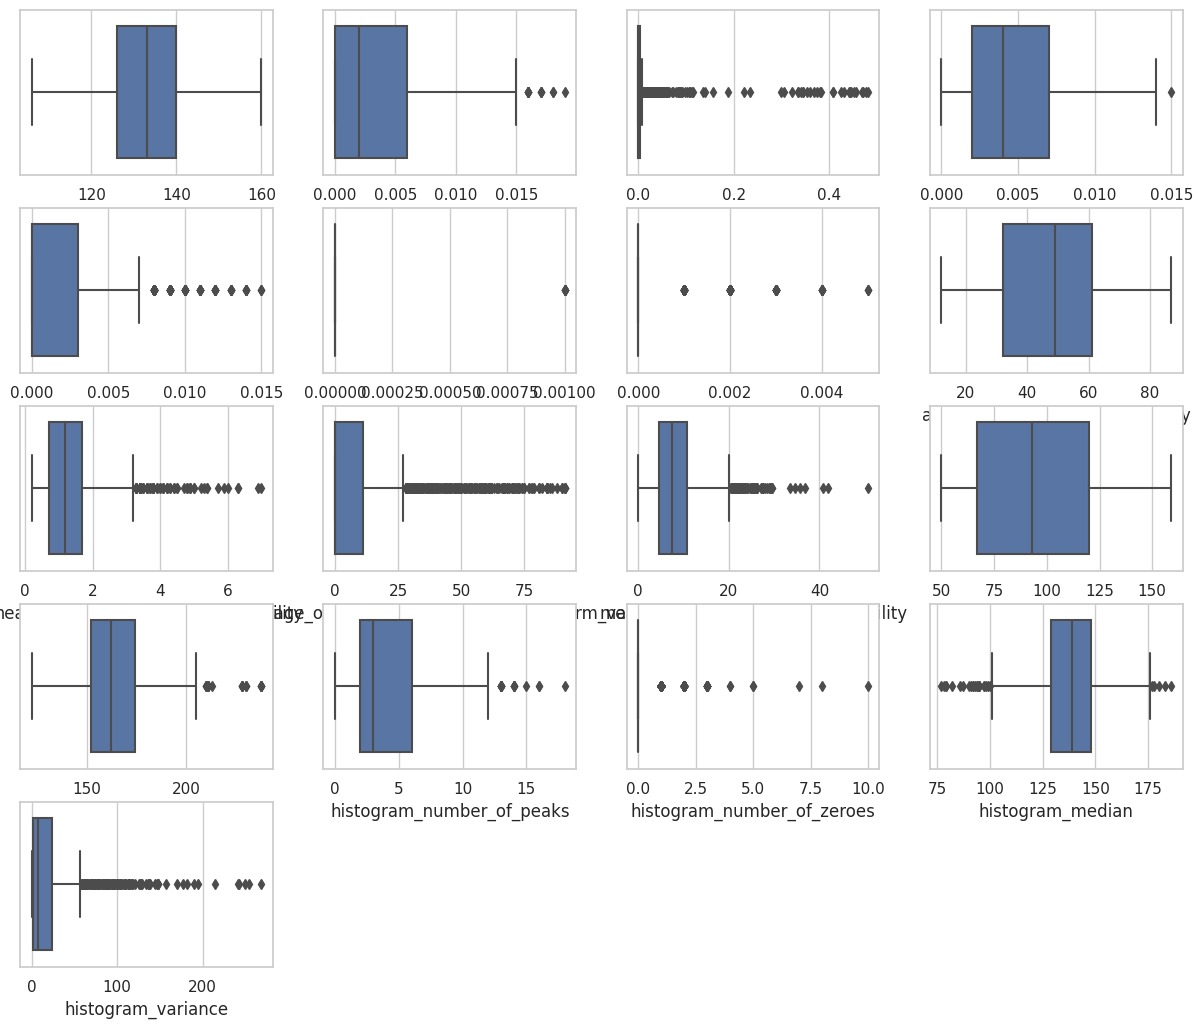

In [ ]:
plt.figure(figsize=(15,15))
col = X.columns[:-1]
for i in enumerate(col):
  plt.subplot(6,4,i[0]+1)
  sns.boxplot(x=i[1],data=X)

In [ ]:
for i in col:
  q1 = X[i].quantile(0.15)
  q4 = X[i].quantile(0.85)
  X[i][X[i]<=q1] = q1
  X[i][X[i]>=q4] = q4

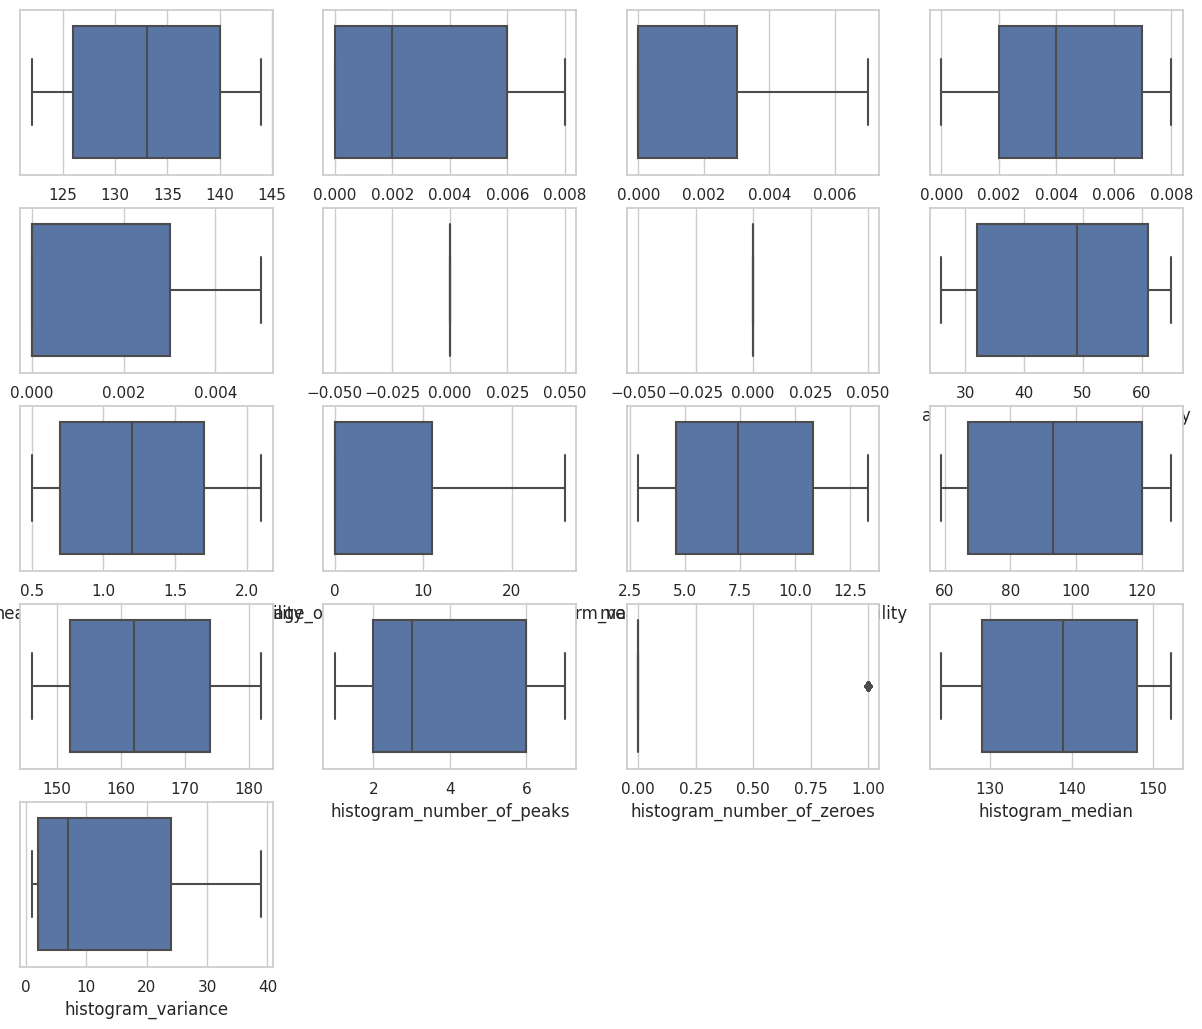

In [ ]:
plt.figure(figsize=(15,15))
col = X.columns[:-1]
for i in enumerate(col):
  plt.subplot(6,4,i[0]+1)
  sns.boxplot(x=i[1],data=X)

##Opciones de Modelos

In [ ]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

##PCA
#Reducir Dimensionalidad

In [ ]:
from sklearn.decomposition import PCA

##UnderSampling

In [ ]:
rus=RandomUnderSampler(random_state = 0) #El docente aplicó RUS para esta base
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
y_rus.value_counts()

1.0    176
2.0    176
3.0    176
Name: fetal_health, dtype: int64

<ipython-input-16-3c25d68c9f01>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,10,1)


(0.0, 10.0)

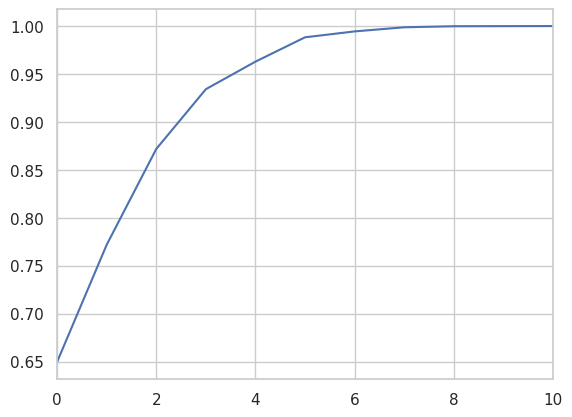

In [ ]:
pca = PCA().fit(X_rus)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)

In [ ]:
pca5 = PCA(n_components=5)
X_PCA = pca5.fit_transform(X_rus)
# Si aplicamos dimensionalidad de datos, ya no realizamos el escalado
# porque ya realiza ese proceso.

In [ ]:
y_rus_dummies = pd.get_dummies(y_rus)

##OverSampling

In [ ]:
ros = RandomOverSampler(random_state = 0)
X_ros, y_ros = ros.fit_resample(X,y)

In [ ]:
y_ros.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

##SMOTE

In [ ]:
smo = SMOTE(random_state = 0)
X_smo, y_smo = smo.fit_resample(X,y)

In [ ]:
y_smo.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [ ]:
X_PCA

array([[ 4.09440607e+01,  7.27036572e+00,  2.23887617e+01,
        -2.26953301e+00,  1.09264421e+01],
       [ 8.50051928e+00,  1.96441245e-01,  5.56434102e+00,
        -2.06861898e+00, -8.60927677e+00],
       [ 2.10968464e+01,  2.41685630e+01, -1.23818150e-02,
        -2.08017123e+01, -6.10742920e+00],
       ...,
       [ 3.92595984e+01, -5.17332287e+00, -1.29081433e+01,
         1.01356692e+01, -6.38543230e+00],
       [ 3.80186154e+01, -5.43831015e+00, -1.28035731e+01,
         8.17482724e+00, -7.65424994e+00],
       [ 3.68570276e+01, -1.80805957e+01,  7.73527480e-01,
         1.20974298e+01,  2.19410536e-01]])

##Evaluación

In [ ]:
##X_PCA.hist()


##Modelado

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_PCA,y_rus_dummies,random_state=10,test_size=0.3)

In [ ]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(10, activation='relu'))
modelANN.add(Dense(6, activation='relu'))
modelANN.add(Dense(3, activation='softmax'))

modelANN.compile(optimizer = "adam",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [ ]:
y_train_rus.shape

(369, 3)

In [ ]:
modelANN.fit(x = X_train_rus, y = y_train_rus, validation_data=(X_test_rus,y_test_rus), batch_size=50, epochs=250, verbose=1)

Epoch 1/250
8/8 [==============================] - 2s 47ms/step - loss: 2.8150 - accuracy: 0.2927 - val_loss: 2.6796 - val_accuracy: 0.3208
Epoch 2/250
8/8 [==============================] - 0s 8ms/step - loss: 2.4185 - accuracy: 0.3062 - val_loss: 2.3258 - val_accuracy: 0.3836
Epoch 3/250
8/8 [==============================] - 0s 10ms/step - loss: 2.1061 - accuracy: 0.3496 - val_loss: 2.0755 - val_accuracy: 0.4025
Epoch 4/250
8/8 [==============================] - 0s 9ms/step - loss: 1.8756 - accuracy: 0.3794 - val_loss: 1.8755 - val_accuracy: 0.4214
Epoch 5/250
8/8 [==============================] - 0s 9ms/step - loss: 1.6950 - accuracy: 0.4119 - val_loss: 1.7103 - val_accuracy: 0.4465
Epoch 6/250
8/8 [==============================] - 0s 10ms/step - loss: 1.5558 - accuracy: 0.4309 - val_loss: 1.5709 - val_accuracy: 0.4654
Epoch 7/250
8/8 [==============================] - 0s 10ms/step - loss: 1.4471 - accuracy: 0.4417 - val_loss: 1.4522 - val_accuracy: 0.4843
Epoch 8/250
8/8 [======

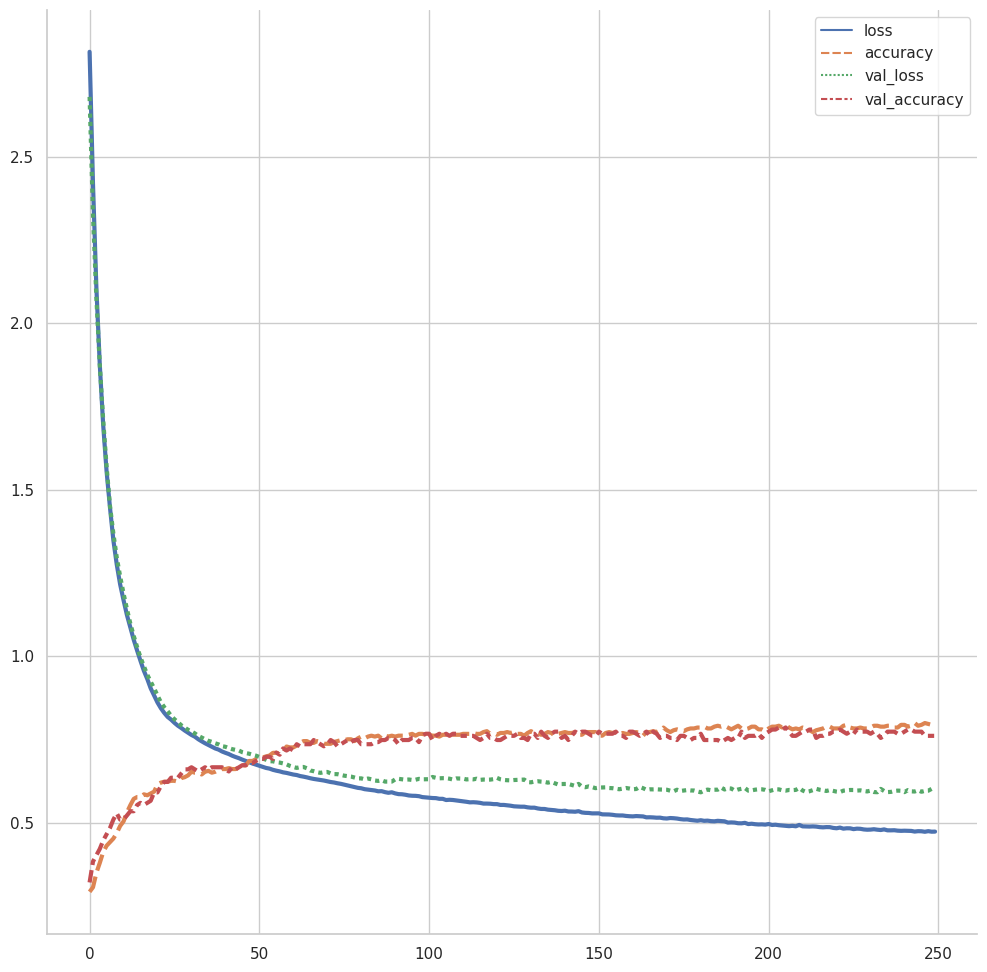

In [ ]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()